In [1]:
import numpy as np
from qiskit import Aer, QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector
from qiskit.opflow import StateFn, PauliSumOp, AerPauliExpectation, ListOp, Gradient, OperatorStateFn
from qiskit.utils import QuantumInstance
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(0, os.path.join("..", "..","src"))
from qiskit_utils import BinaryObjectiveFunction
import matplotlib.pyplot as plt

# Set a random seed
np.random.seed(42)

In [2]:
# Set a random seed
np.random.seed(42)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_columns', None)
card = pd.read_csv(r'creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
from sklearn.preprocessing import StandardScaler

features = ['V'+str(i) for i in range(1,29)]# Separating out the features
print(features)
x = card.loc[:, features].values# Separating out the target
y = card.loc[:,['Class']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC_1', 'PC_2'])
finalDf = pd.concat([principalDf, card[['Class']]], axis = 1)
print(finalDf)

            PC_1      PC_2  Class
0      -0.159489  0.437233      0
1       0.429272  0.292809      0
2      -0.185115  2.124219      0
3      -1.880863  1.746039      0
4       0.078020 -0.012290      0
...          ...       ...    ...
284802  3.010082 -2.320279      0
284803  0.850977  2.213870      0
284804 -0.387380 -0.031430      0
284805 -0.157637 -0.940931      0
284806  0.452724  0.157124      0

[284807 rows x 3 columns]


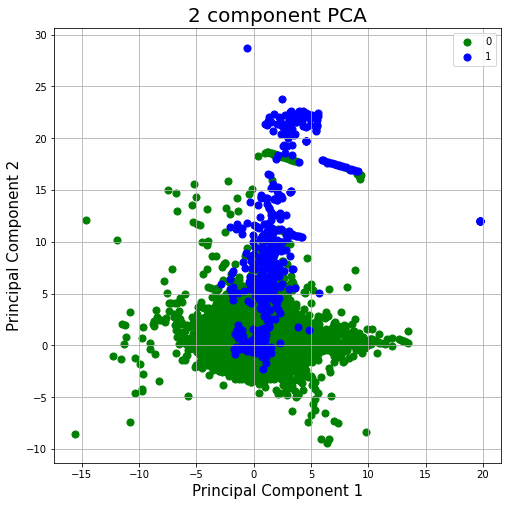

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC_1']
               , finalDf.loc[indicesToKeep, 'PC_2']
#              , finalDf.loc[indicesToKeep, 'PC_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [8]:
good_idx = finalDf['Class'] == 0
bad_idx = finalDf['Class'] == 1

good_data = finalDf.loc[good_idx]
bad_data = finalDf.loc[bad_idx]
print(good_data.shape)
print(bad_data.shape)

good_sampling = np.random.randint(len(good_data), size=200)
final_good = good_data.loc[good_data.index.values[good_sampling]].reset_index(drop=True)

bad_sampling = np.random.randint(len(bad_data), size=200)
final_bad = bad_data.loc[bad_data.index.values[bad_sampling]].reset_index(drop=True)

final = pd.concat([final_good, final_bad], axis=0)

from sklearn.utils import shuffle
final = shuffle(final).reset_index(drop=True)
print(final)

(284315, 3)
(492, 3)
         PC_1       PC_2  Class
0    0.166049  -0.415800      0
1    0.959359   5.088638      1
2    2.228830  22.094746      1
3    0.004123   5.401093      1
4    0.403141   0.107433      0
..        ...        ...    ...
395 -0.127230  -0.209708      0
396 -0.211004   4.117775      1
397  0.092443  -0.260135      1
398  2.317528   0.230972      1
399 -1.792219   4.360807      1

[400 rows x 3 columns]


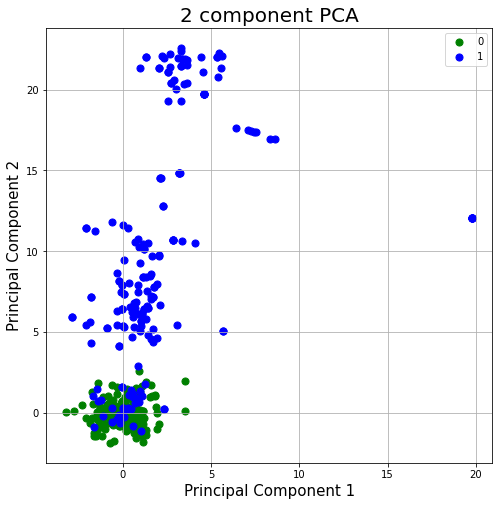

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final['Class'] == target
    ax.scatter(final.loc[indicesToKeep, 'PC_1']
               , final.loc[indicesToKeep, 'PC_2']
#              , finalDf.loc[indicesToKeep, 'PC_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [10]:
X_train = final.values
X_train = np.hstack((X_train[:,:-1], np.zeros((X_train.shape[0], 1)))) # padding to reach 3 dimensions
label_angles = np.asarray([y if y==1 else -1 for y in final.loc[:,'Class']]).reshape(-1,1)
X_train = np.hstack((X_train, label_angles))
new_y_train = np.ones(((X_train.shape[0], 1)))
print(X_train)

[[ 0.16604913 -0.41579972  0.         -1.        ]
 [ 0.95935858  5.08863832  0.          1.        ]
 [ 2.22882954 22.09474612  0.          1.        ]
 ...
 [ 0.09244333 -0.26013479  0.          1.        ]
 [ 2.31752796  0.23097243  0.          1.        ]
 [-1.7922192   4.36080688  0.          1.        ]]


In [11]:
import random
from sklearn.utils import shuffle

t_good_idx = finalDf['Class'] == 0
t_bad_idx = finalDf['Class'] == 1

new_good_data = finalDf.loc[t_good_idx]
new_bad_data = finalDf.loc[t_bad_idx]

new_good_sampling = random.sample([i for i in range(len(new_good_data)) if i not in good_sampling],330)
new_final_good = new_good_data.loc[new_good_data.index.values[new_good_sampling]].reset_index(drop=True)

new_bad_sampling = [i for i in range(len(new_bad_data)) if i not in bad_sampling]
new_final_bad = new_bad_data.loc[new_bad_data.index.values[new_bad_sampling]].reset_index(drop=True)

new_final = pd.concat([new_final_good, new_final_bad], axis=0)
new_final = shuffle(new_final).reset_index(drop=True)

val_features = np.array(new_final.values[:,:-1])
val_targets = np.array(new_final.values[:,-1].reshape([-1,1]))


X_test = new_final.values
X_test = np.hstack((X_test[:,:-1], np.zeros((X_test.shape[0], 1)))) # padding to reach 3 dimensions
test_label_angles = np.asarray([y if y==1 else -1 for y in new_final.loc[:,'Class']]).reshape(-1,1)
X_test = np.hstack((X_test, test_label_angles))


In [12]:
# set method to calculcate expected values
expval = AerPauliExpectation()

# define gradient method
gradient = Gradient()

In [13]:
# define quantum instances (statevector and sample based)
qi_sv = QuantumInstance(Aer.get_backend('aer_simulator_statevector'))

# we set shots to 10 as this will determine the number of samples later on.
qi_qasm = QuantumInstance(Aer.get_backend('aer_simulator'), shots=10)

In [14]:
from qiskit_machine_learning.neural_networks import NeuralNetwork
from qiskit_machine_learning.utils.loss_functions import Loss
from typing import Optional, Union
import numpy as np

try:
    from sparse import SparseArray
except ImportError:

    class SparseArray:  # type: ignore
        """Empty SparseArray class
        Replacement if sparse.SparseArray is not present.
        """

        pass
    
class ObjectiveFunction2:
    """An abstract objective function. Provides methods for computing objective value and
    gradients for forward and backward passes."""

    # pylint: disable=invalid-name
    def __init__(
        self, X: np.ndarray, y: np.ndarray, neural_network1: NeuralNetwork, neural_network2: NeuralNetwork, loss: Loss
    ) -> None:
        """
        Args:
            X: The input data.
            y: The target values.
            neural_network: An instance of an quantum neural network to be used by this
                objective function.
            loss: A target loss function to be used in training.
        """
        super().__init__()
        self._X = X
        self._y = y
        self._neural_network1 = neural_network1
        self._neural_network2 = neural_network2
        self._loss = loss
        self._last_forward_weights: Optional[np.ndarray] = None
        self._last_forward: Optional[Union[np.ndarray, SparseArray]] = None

    def objective(self, weights: np.ndarray) -> float:
        """Computes the value of this objective function given weights.

        Args:
            weights: an array of weights to be used in the objective function.

        Returns:
            Value of the function.
        """
        raise NotImplementedError

    def gradient(self, weights: np.ndarray) -> np.ndarray:
        """Computes gradients of this objective function given weights.

        Args:
            weights: an array of weights to be used in the objective function.

        Returns:
            Gradients of the function.
        """
        raise NotImplementedError

    def _neural_network_forward(self, weights: np.ndarray) -> Union[np.ndarray, SparseArray]:
        """
        Computes and caches the results of the forward pass. Cached values may be re-used in
        gradient computation.

        Args:
            weights: an array of weights to be used in the forward pass.

        Returns:
            The result of the neural network.
        """
        # if we get the same weights, we don't compute the forward pass again.
        if self._last_forward_weights is None or (
            not np.all(np.isclose(weights, self._last_forward_weights))
        ):
            fwd = []
            for xi in self._X:
                if xi[-1] == 1:
                # compute forward and cache the results for re-use in backward
                    fwd.append(self._neural_network1.forward(xi, weights))
                elif xi[-1] == -1:
                    fwd.append(self._neural_network2.forward(xi, weights))
                else:
                    raise NotImplementedError
                # a copy avoids keeping a reference to the same array, so we are sure we have
                # different arrays on the next iteration.
            self._last_forward = np.asarray(fwd).reshape(-1,1)
            self._last_forward_weights = np.copy(weights)
        return self._last_forward

In [15]:
losses = []
class BinaryObjectiveFunction(ObjectiveFunction2):
    """An objective function for binary representation of the output,
    e.g. classes of ``-1`` and ``+1``."""

    def objective(self, weights: np.ndarray) -> float:
        # predict is of shape (N, 1), where N is a number of samples
        predict = self._neural_network_forward(weights)
        target = np.array(self._y).reshape(predict.shape)
        # float(...) is for mypy compliance
        return float(np.sum(self._loss(predict, target)))

    def gradient(self, weights: np.ndarray) -> np.ndarray:
        # check that we have supported output shape
        num_outputs = self._neural_network1.output_shape[0]
        if num_outputs != 1:
            raise ValueError(f"Number of outputs is expected to be 1, got {num_outputs}")
        
#         print("x: ", self._X.shape,self._X[-1])
        # output must be of shape (N, 1), where N is a number of samples
        output = self._neural_network_forward(weights)
        print("weights: ", weights)
#         output = (output + np.ones(output.shape)) * 0.5 # map to 0-1
        weight_grad = []
        for xi in self._X:
            if xi[-1] == 1:
                # weight grad is of shape (N, 1, num_weights)
                _, wg = self._neural_network1.backward(xi, weights)
            elif xi[-1] == -1:
                # weight grad is of shape (N, 1, num_weights)
                _, wg = self._neural_network2.backward(xi, weights)
            else:
                    raise NotImplementedError
            weight_grad.append(wg[0])
        weight_grad = np.asarray(weight_grad)
        # we reshape _y since the output has the shape (N, 1) and _y has (N,)
        # loss_gradient is of shape (N, 1)
        loss_gradient = self._loss.gradient(output, self._y.reshape(-1, 1))
        loss = self._loss.evaluate(output, self._y.reshape(-1, 1))
        print("loss: ", np.sum(loss)/len(loss))
        losses.append(np.sum(loss)/len(loss))
        # for the output we compute a dot product(matmul) of loss gradient for this output
        # and weights for this output.
        grad = loss_gradient[:, 0] @ weight_grad[:, 0, :]
        # we keep the shape of (1, num_weights)
        grad = grad.reshape(1, -1)

        return grad

In [16]:
from qiskit_machine_learning.neural_networks import OpflowQNN

In [17]:
from qiskit.quantum_info import DensityMatrix, Operator

inputs = ParameterVector('input', length=4) # 1 extra for label
# inputs = ParameterVector('input', length=3)
weights = ParameterVector('weight', length=8) # 3 extra for activation/bias

# 1qubit classifier
qc1 = QuantumCircuit(1)
qc1.u(weights[5], weights[6], weights[7],0)
qc1.rz(inputs[0]*weights[0]+inputs[1]*weights[1]+inputs[2]*weights[2] + weights[3],0)
qc1.ry(weights[4],0)

qc_sfn1 = StateFn(qc1)

H1 = StateFn(PauliSumOp.from_list([('Z', 1.0)]))  
H2 = StateFn(PauliSumOp.from_list([('Z', -1.0)]))  

op1 = ~H1 @ (qc_sfn1)
op2 = ~H2 @ (qc_sfn1)
print(op1)

ComposedOp([
  OperatorMeasurement(1.0 * Z),
  CircuitStateFn(
       ┌──────────────────────────────────┐»
  q_0: ┤ U(weight[5],weight[6],weight[7]) ├»
       └──────────────────────────────────┘»
  «     ┌──────────────────────────────────────────────────────────────────────────────┐»
  «q_0: ┤ Rz(input[0]*weight[0] + input[1]*weight[1] + input[2]*weight[2] + weight[3]) ├»
  «     └──────────────────────────────────────────────────────────────────────────────┘»
  «     ┌───────────────┐
  «q_0: ┤ Ry(weight[4]) ├
  «     └───────────────┘
  )
])


In [18]:
qnn1 = OpflowQNN(op1, inputs, weights, expval, gradient, qi_sv, input_gradients=True)
qnn2 = OpflowQNN(op2, inputs, weights, expval, gradient, qi_sv, input_gradients=True)

In [19]:
from qiskit.algorithms.optimizers import ADAM, L_BFGS_B
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.utils.loss_functions import (
    Loss,
    L1Loss,
    L2Loss,
    CrossEntropyLoss,
    CrossEntropySigmoidLoss,
)

function = BinaryObjectiveFunction(X_train, new_y_train, qnn1, qnn2, L2Loss())
print(function.gradient)

losses = []
# optimizer = ADAM(maxiter=100, lr=0.8)
optimizer = L_BFGS_B(maxiter=100)
# fit_result = optimizer.minimize(
fit_result = optimizer.optimize( 
    num_vars=qnn1.num_weights,
# fit_result = optimizer.minimize(
    objective_function=function.objective,
    initial_point=algorithm_globals.random.random(qnn1.num_weights),
#     initial_point = [-0.24500131,  1.56837407,  2.16465157, -0.19917348, -0.27137013,
#         0.44986293,  3.61033542,  0.70411823, -1.03380395],
    gradient_function=function.gradient,
)

print(fit_result)

<bound method BinaryObjectiveFunction.gradient of <__main__.BinaryObjectiveFunction object at 0x0000027CA50AFA00>>
weights:  [0.51604097 0.92887676 0.24903321 0.03088381 0.46096483 0.60630399
 0.53164811 0.9127187 ]
loss:  1.3108605640492266
weights:  [ 0.44456445  0.8659607   0.24903321 -0.05596408  1.12807873  1.33486875
  0.44480022  0.9127187 ]
loss:  0.9984922717224471
weights:  [ 0.51956299  1.15131577  0.24903321 -0.06060414  1.18958018  1.40269442
  0.44016016  0.9127187 ]
loss:  1.069232308071473
weights:  [ 0.4621809   0.93298792  0.24903321 -0.05705398  1.14252484  1.35080037
  0.44371031  0.9127187 ]
loss:  0.8337718845282773
weights:  [ 0.4862514   0.95396119  0.24903321 -0.04846093  1.0665406   1.26727231
  0.45230337  0.9127187 ]
loss:  0.7952753892229337
weights:  [ 0.51079021  0.93164866  0.24903321 -0.02556373  0.8564642   1.03738634
  0.47520057  0.9127187 ]
loss:  0.793340966856825
weights:  [ 0.49748322  0.94374838  0.24903321 -0.0379805   0.97038517  1.16204971
  

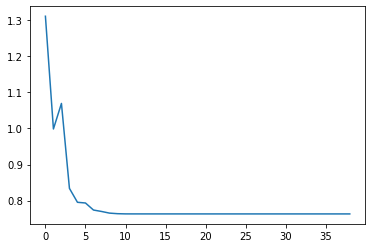

In [20]:
plt.plot(losses)

In [19]:
ws = [ 1.25057594, -1.38167294,  1.30184687,  0.74877937, -1.65893033,
        1.16448143,  1.3074473 ,  0.22893918,  4.94326312]

ws = [-1.99169907, -1.45083137, -0.58703029,  5.27810314,  4.58990923,
        5.38701561,  1.95003618,  0.97021714,  2.58350397]

ws = [-0.24500131,  1.56837407,  2.16465157, -0.19917348, -0.27137013,
        0.44986293,  3.61033542,  0.70411823, -1.03380395]

ws = [ 0.73526243, -0.27777881, -0.06189058,  1.03107754 , 0.86795011,  3.04539571,
  3.90483169,  0.704118,    1.64347821]

ws = [ 0.82227922, -0.40886506, -0.24672953,  0.92326863,  0.99052758,  3.01854603,
  4.00785433,  0.70411802,  1.49928166]

ws = [ 0.24971483,  1.0130086,   0.42077521, -0.04789372,  0.69722048, -0.0866758,
 -0.63077757,  0.98557029,  0.27907908,  1.2140684 ,  0.4184071,   0.91394409,
  0.42307811,  0.70724328,  0.41264207]

ws = [ 1.01180113,  0.34321002,  0.86534557,  0.52148962, -0.28933151,  0.42036649,
  1.93015893,  0.51026066,  0.10362597,  0.91959205,  0.2024445,   1.46312895,
  0.62643051,  0.2538462,   1.31934104, -0.02049606, -0.38568446,  0.43729156]

ws = [ 0.81002245,  0.73620383,  0.86534557,  0.17807014, -1.12034435,  0.3639984,
  1.85705536,  0.51026066, -0.04082386 , 2.61819378,  0.45744516,  1.42455561,
  0.62643051, -0.02207456,  2.07627674,  0.4126864,  -0.72910394,  0.43729156]

ws = [ 0.49079398,  0.94960546,  0.24903321, -0.14771541,  0.90910511,
        1.1611882 ,  0.35304888,  0.9127187 ]

count = 0
tp=0
fn = 0
fp = 0
y_predict = []
y_tensor = []
for x in X_train:
    out = qnn1.forward(x, ws)
    label = 0
    if out>0:
        label = 1
    else:
        label = -1
    if label == x[-1]:
        count +=1
        if label ==1: 
            tp +=1
    else:
        if label == 1:
            fn +=1
        else:
            fp +=1
    y_predict.append(label)
    y_tensor.append(x[-1])
print(count/len(X_train))
# print(len(X_train))
print("tp: ", tp, "tn: ", count-tp," fp: ", fp, " fn: ", fn)

0.7275
tp:  127 tn:  164  fp:  73  fn:  36


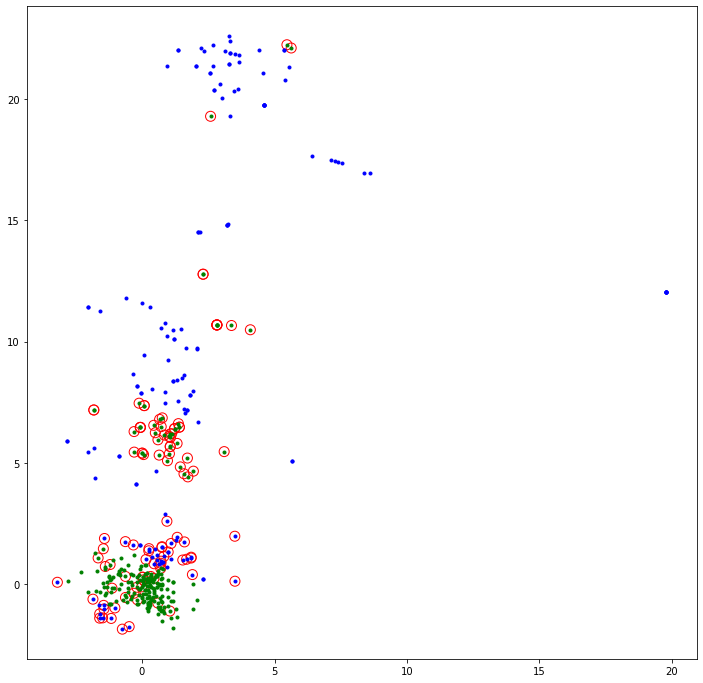

In [20]:
# print('Accuracy:', acc/len(y_tensor))
plt.figure(figsize=(12,12))
for x, y_target, y_ in zip(X_train, y_tensor, y_predict):
    if y_ == 1:
        plt.plot(x[0], x[1], 'bo', markersize=3)
    else:
        plt.plot(x[0], x[1], 'go', markersize=3)
    if y_target != y_:
        plt.scatter(x[0], x[1], s=100, facecolors='none', edgecolors='r', linewidths=1)
plt.show()

In [21]:
X_test = np.load("2_layers_test.npy")

count = 0
tp=0
fn = 0
fp = 0
y_predict = []
y_tensor = []
for x in X_test:
    out = qnn1.forward(x, ws)
    label = 0
    if out>0:
        label = 1
    else:
        label = -1
    if label == x[-1]:
        count +=1
        if label ==1: 
            tp +=1
    else:
        if label == 1:
            fn +=1
        else:
            fp +=1
    y_predict.append(label)
    y_tensor.append(x[-1])
print(count/len(X_test))
# print(len(X_train))
print("tp: ", tp, "tn: ", count-tp," fp: ", fp, " fn: ", fn)

0.697289156626506
tp:  187 tn:  276  fp:  147  fn:  54


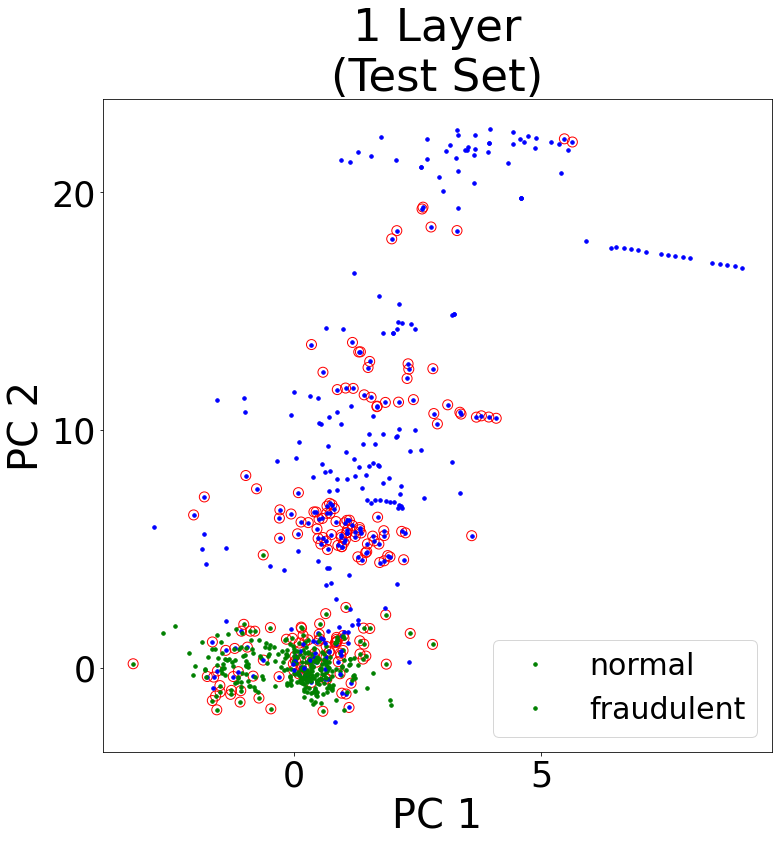

In [22]:
# print('Accuracy:', acc/len(y_tensor))
plt.figure(figsize=(12,12))

plt.xlabel('PC 1', fontsize = 40)
plt.ylabel('PC 2', fontsize = 40)
plt.title('1 Layer\n(Test Set)', fontsize = 45)
for x, y_target, y_ in zip(X_test, y_tensor, y_predict):
    if x[0] < 15 and x[1] < 25:
        if y_target == 1:
            plt.plot(x[0], x[1], 'bo', markersize=3.5)
        else:
            plt.plot(x[0], x[1], 'go', markersize=3.5)
        if y_target != y_:
            plt.scatter(x[0], x[1], s=100, facecolors='none', edgecolors='r', linewidths=1)

plt.legend(['normal', 'fraudulent'], prop={'size': 30})
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

# To specify the number of ticks on both or any single axes
plt.locator_params(axis='y', nbins=5, min_n_ticks=2)
plt.locator_params(axis='x', nbins=4, min_n_ticks=2)


plt.show()

(664,)
(664,)
(664,)
(664,)


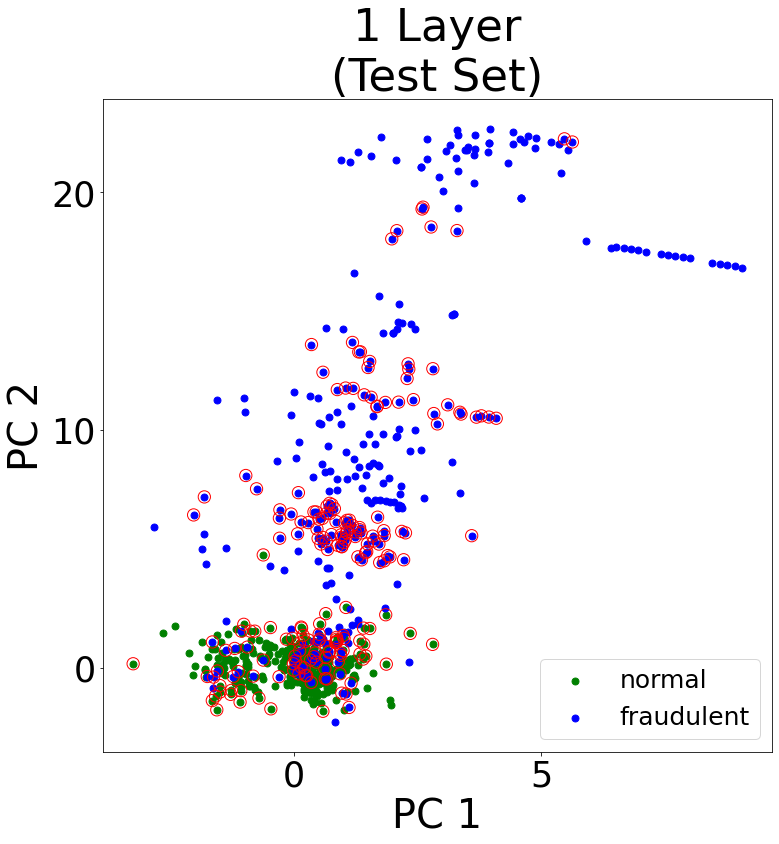

In [24]:
fig = plt.figure(figsize = (12,12))

plt.xlabel('PC 1', fontsize = 40)
plt.ylabel('PC 2', fontsize = 40)
plt.title('1 Layer\n(Test Set)', fontsize = 45)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

targets = [-1, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = np.array(y_tensor) == target
    filter1 = np.abs(X_test[:, 0]) < 15
    filter2 = np.abs(X_test[:, 1]) < 25
    print(indicesToKeep.shape)
    print(filter1.shape)
    final_indices = np.logical_and(filter1, indicesToKeep)
    final_indices = np.logical_and(filter2, final_indices)
    plt.scatter(X_test[final_indices, 0], X_test[final_indices, 1],
    c = color, s = 48)

    
for x, y_target, y_ in zip(X_test, y_tensor, y_predict):
    if x[0]<15 and x[1] < 25:
        if y_target != y_:
            plt.scatter(x[0], x[1], s=150, facecolors='none', edgecolors='r', linewidths=1)
            
plt.legend(['normal', 'fraudulent'], prop={'size': 25}, loc="lower right")

# To specify the number of ticks on both or any single axes
plt.locator_params(axis='y', nbins=5, min_n_ticks=2)
plt.locator_params(axis='x', nbins=4, min_n_ticks=2)